<a href="https://colab.research.google.com/github/tilangelo/ML.2025-26/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# 1. Введение

В этом задании проводится EDA и обучение линейной регрессии для предсказания финальной оценки G3. Все шаги снабжены кодом и графиками.

## 2. Загрузка и предварительный анализ данных

Кратко загружаем данные, смотрим форму и первые строки.

In [ ]:
# 2. Загрузка и предварительный анализ данных
import pandas as pd
df = pd.read_csv('student-mat.csv')
print('Форма данных:', df.shape)
display(df.head())
print('\nИнформация о столбцах:')
display(df.dtypes)


Форма данных: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Информация о столбцах:


,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


## 3. Исследовательский анализ данных (EDA)

Проверка пропусков, распределения и взаимосвязи признаков.

### Проверка пропусков и описательная статистика


In [ ]:
# 3.1. Проверка пропусков и описательная статистика
missing = df.isnull().sum()
print('Пропуски (столько >0):')
print(missing[missing>0] if missing.sum()>0 else 'Пропусков нет')
print('\nОписательная статистика по числовым признакам:')
display(df.describe().round(3))


Пропуски (столько >0):
Пропусков нет

Описательная статистика по числовым признакам:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000
mean,16.696,2.749,2.522,1.448,2.035,0.334,3.944,3.235,3.109,1.481,2.291,3.554,5.709,10.909,10.714,10.415
std,1.276,1.095,1.088,0.698,0.839,0.744,0.897,0.999,1.113,0.891,1.288,1.390,8.003,3.319,3.762,4.581
min,15.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,3.000,0.000,0.000
25%,16.000,2.000,2.000,1.000,1.000,0.000,4.000,3.000,2.000,1.000,1.000,3.000,0.000,8.000,9.000,8.000
50%,17.000,3.000,2.000,1.000,2.000,0.000,4.000,3.000,3.000,1.000,2.000,4.000,4.000,11.000,11.000,11.000
75%,18.000,4.000,3.000,2.000,2.000,0.000,5.000,4.000,4.000,2.000,3.000,5.000,8.000,13.000,13.000,14.000
max,22.000,4.000,4.000,4.000,4.000,3.000,5.000,5.000,5.000,5.000,5.000,5.000,75.000,19.000,19.000,20.000


### Распределение G3


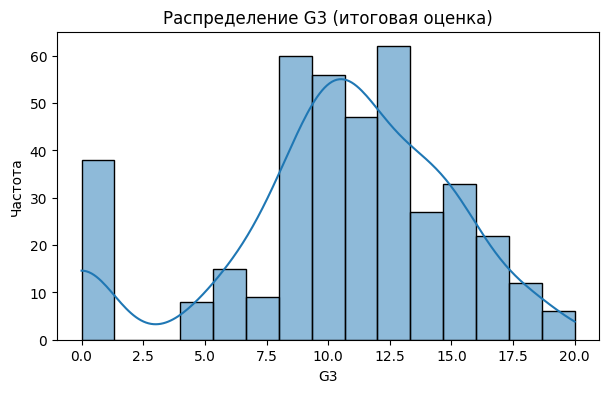

In [ ]:
# 3.2. Распределение целевой переменной G3
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.histplot(df['G3'], bins=15, kde=True)
plt.title('Распределение G3 (итоговая оценка)')
plt.xlabel('G3')
plt.ylabel('Частота')
plt.show()


### G1 и G2 против G3 (scatter)


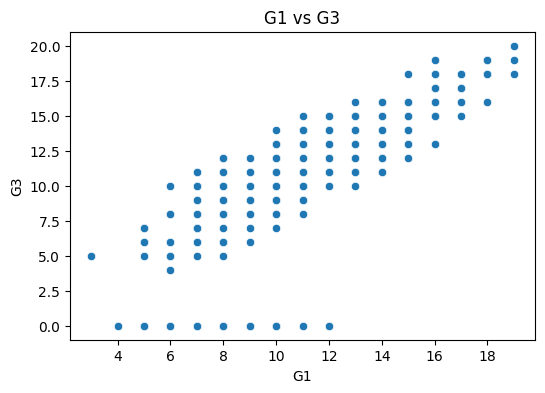

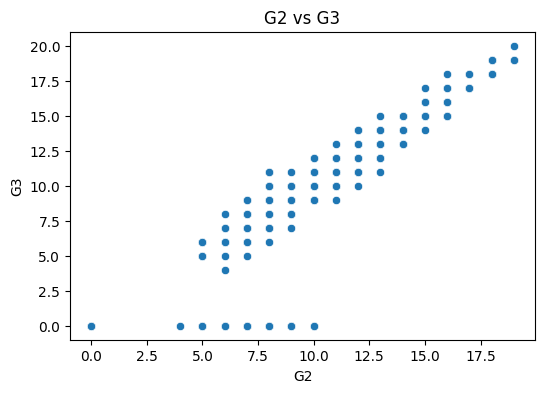

In [ ]:
# 3.3. Зависимости G1/G2 -> G3
plt.figure(figsize=(6,4))
sns.scatterplot(x='G1', y='G3', data=df)
plt.title('G1 vs G3')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='G2', y='G3', data=df)
plt.title('G2 vs G3')
plt.show()


### Корреляции


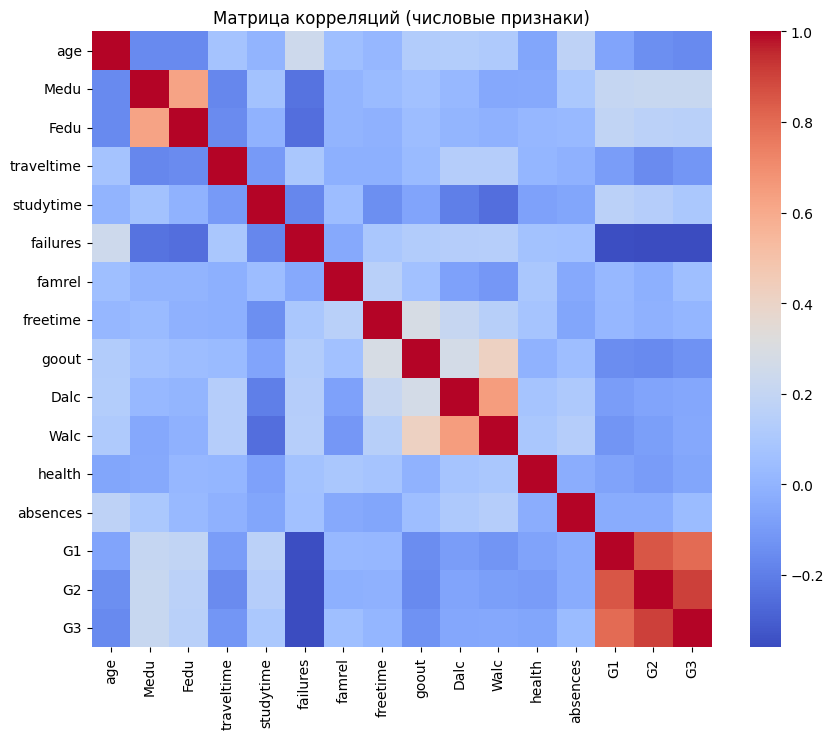


Топ корреляций с G3:


,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
Fedu,0.152457
studytime,0.097820
famrel,0.051363
absences,0.034247
freetime,0.011307
Walc,-0.051939


In [ ]:
# 3.4. Корреляционная матрица числовых признаков
numeric = df.select_dtypes(include=['number'])
corr = numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций (числовые признаки)')
plt.show()
print('\nТоп корреляций с G3:')
display(corr['G3'].sort_values(ascending=False).head(10))


### Boxplots


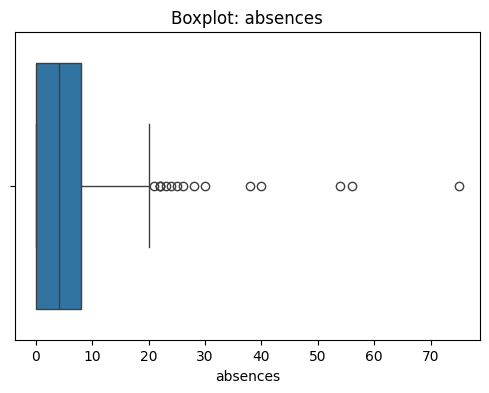

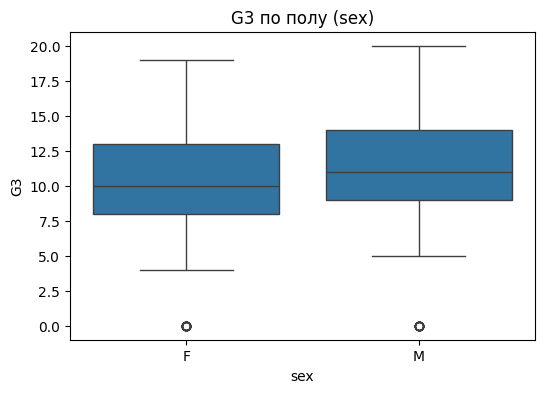

In [ ]:
# 3.5. Boxplots: absences и G3 по полу
plt.figure(figsize=(6,4))
sns.boxplot(x=df['absences'])
plt.title('Boxplot: absences')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='G3', data=df)
plt.title('G3 по полу (sex)')
plt.show()


### Подготовка данных


In [ ]:
# 4.1. Подготовка данных для регрессии (числовые признаки)
numeric = df.select_dtypes(include=['number']).copy()
y = numeric['G3']
X = numeric.drop(columns=['G3']).copy()
print('Числовых признаков:', X.shape[1])
print('Есть ли пропуски в X:', X.isnull().sum().sum())
# Заполним средним, если есть пропуски
X = X.fillna(X.mean())


Числовых признаков: 15
Есть ли пропуски в X: 0


### Модель на всей выборке


In [ ]:
# 4.2. Линейная регрессия на всей выборке
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
lr = LinearRegression()
lr.fit(X, y)
y_pred_all = lr.predict(X)
print('MAE =', mean_absolute_error(y, y_pred_all))
print('RMSE =', math.sqrt(mean_squared_error(y, y_pred_all)))
print('R2 =', r2_score(y, y_pred_all))


MAE = 1.1696509241269823
RMSE = 1.842712230622068
R2 = 0.8378147296769527


### Оценка на отложенной выборке


In [ ]:
# 4.3. Разбиение на train/test и оценка модели
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred_test = lr2.predict(X_test)
print('MAE (test) =', mean_absolute_error(y_test, y_pred_test))
print('RMSE (test) =', math.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R2 (test) =', r2_score(y_test, y_pred_test))


MAE (test) = 1.3481637884413593
RMSE (test) = 2.1222085556607255
R2 (test) = 0.7803580213768332


### Предсказанные vs Реальные значения


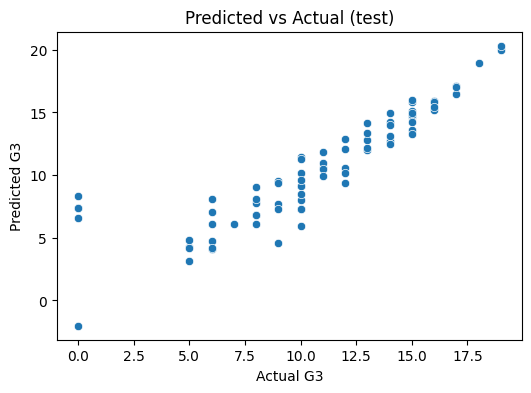

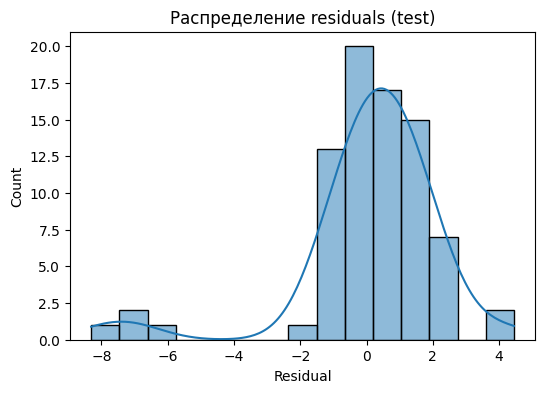

In [ ]:
# 4.4. Графики: Предсказанные vs Реальные значения и распределение остатков
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Предсказанные vs Реальные значения')
plt.show()

plt.figure(figsize=(6,4))
residuals = y_test - y_pred_test
sns.histplot(residuals, bins=15, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Residual')
plt.show()


### Коэффициенты модели


In [ ]:
# 4.5. Коэффициенты модели (отсортированы по абсолютной величине)
coef_df = pd.DataFrame({'feature': X.columns, 'coef': lr2.coef_})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)
display(coef_df.head(15))


,feature,coef,abs_coef
14,G2,0.977534,0.977534
5,failures,-0.416258,0.416258
6,famrel,0.334612,0.334612
0,age,-0.198011,0.198011
2,Fedu,-0.188338,0.188338
13,G1,0.160748,0.160748
8,goout,0.137633,0.137633
3,traveltime,0.131009,0.131009
9,Dalc,-0.105011,0.105011
1,Medu,0.094194,0.094194


# 5. Заключение

- В датасете 395 строк и 33 столбцов. Пропусков: нет.
- Наиболее сильные предикторы финальной оценки G3: G2 (корр=0.9049), G1 (корр=0.8015) — это G2 и G1.
- Результаты линейной регрессии на тестовой выборке: MAE = 1.3482, RMSE = 2.1222, R2 = 0.7804.
- Рекомендации: для изучения влияния социальных факторов убрать G1/G2 и провести one-hot кодирование категориальных признаков;

